In [1]:
#So, in this part, I am going to look at Pitchers, their teams and compare it to their salary to see any correlation  
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
data_salary = "archive/Salaries.csv"

reading_data_salary = pd.read_csv(data_salary)
reading_data_salary.head(15)

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
5,1985,ATL,NL,chambch01,800000
6,1985,ATL,NL,dedmoje01,150000
7,1985,ATL,NL,forstte01,483333
8,1985,ATL,NL,garbege01,772000
9,1985,ATL,NL,harpete01,250000


In [2]:
#salary
salaries_data = pd.read_csv(data_salary)
filter_salary = salaries_data.loc[salaries_data['yearID'] > 1999]
#now it show info from 2000 onwards
filter_salary.head(10)

,yearID,teamID,lgID,playerID,salary
12263,2000,ANA,AL,anderga01,3250000
12264,2000,ANA,AL,belchti01,4600000
12265,2000,ANA,AL,botteke01,4000000
12266,2000,ANA,AL,clemeed02,215000
12267,2000,ANA,AL,colanmi01,200000
12268,2000,ANA,AL,davanje02,200000
12269,2000,ANA,AL,dicksja01,375000
12270,2000,ANA,AL,disarga01,3225000
12271,2000,ANA,AL,erstada01,2500000
12272,2000,ANA,AL,fyhrimi01,210000


In [3]:
#pitching
data_pitching = "archive/Pitching.csv"
pitching_data = pd.read_csv(data_pitching)
pitching_data

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44134,youngch03,2015,1,KCA,AL,11,6,34,18,0,...,0.0,5.0,0.0,0,500.0,3.0,44,4.0,2.0,NaN
44135,zieglbr01,2015,1,ARI,NL,0,3,66,0,0,...,3.0,2.0,1.0,0,263.0,46.0,17,1.0,0.0,NaN
44136,zimmejo02,2015,1,WAS,NL,13,10,33,33,0,...,3.0,2.0,8.0,1,831.0,0.0,89,8.0,2.0,NaN
44137,zitoba01,2015,1,OAK,AL,0,0,3,2,0,...,0.0,0.0,0.0,0,37.0,1.0,8,0.0,0.0,NaN


In [4]:
pitching_dataframe = pd.read_csv(data_pitching)
filter_pitching = pitching_dataframe.loc[pitching_dataframe['yearID']> 1999]
#now it show info from 2000 onwards
filter_pitching.head(25)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
32900,abbotpa01,2000,1,SEA,AL,9,7,35,27,0,...,4.0,3.0,5.0,0,766.0,2.0,89,1.0,4.0,NaN
32901,aceveju01,2000,1,MIL,NL,3,7,62,0,0,...,9.0,3.0,1.0,2,347.0,18.0,38,1.0,1.0,NaN
32902,adamste01,2000,1,LAN,NL,6,9,66,0,0,...,0.0,5.0,0.0,0,369.0,18.0,42,3.0,0.0,NaN
32903,aguilri01,2000,1,CHN,NL,1,2,54,0,0,...,2.0,1.0,4.0,0,210.0,44.0,28,1.0,0.0,NaN
32904,aldresc01,2000,1,PHI,NL,1,3,23,0,0,...,0.0,1.0,1.0,0,95.0,5.0,14,1.0,2.0,NaN
32905,alfonan01,2000,1,FLO,NL,5,6,68,0,0,...,3.0,0.0,1.0,2,311.0,62.0,35,3.0,1.0,NaN
32906,almanar01,2000,1,FLO,NL,4,2,67,0,0,...,6.0,1.0,2.0,0,216.0,8.0,27,2.0,2.0,NaN
32907,almanca01,2000,1,SDN,NL,4,5,62,0,0,...,2.0,2.0,4.0,0,308.0,11.0,35,2.0,3.0,NaN
32908,alvarju01,2000,1,ANA,AL,0,0,11,0,0,...,1.0,1.0,0.0,0,38.0,3.0,9,0.0,1.0,NaN
32909,anderbr02,2000,1,ARI,NL,11,7,33,32,2,...,7.0,1.0,3.0,4,876.0,0.0,101,6.0,6.0,NaN


In [5]:
#this df has the columns with important filtered components
pitching_df = filter_pitching[['playerID', 'yearID', 'teamID', 'G', 'W', 'L']]
pitching_df.head(10)

,playerID,yearID,teamID,G,W,L
32900,abbotpa01,2000,SEA,35,9,7
32901,aceveju01,2000,MIL,62,3,7
32902,adamste01,2000,LAN,66,6,9
32903,aguilri01,2000,CHN,54,1,2
32904,aldresc01,2000,PHI,23,1,3
32905,alfonan01,2000,FLO,68,5,6
32906,almanar01,2000,FLO,67,4,2
32907,almanca01,2000,SDN,62,4,5
32908,alvarju01,2000,ANA,11,0,0
32909,anderbr02,2000,ARI,33,11,7


In [6]:
#to get sum
salaries_sum = filter_salary.groupby(by=['yearID', 'teamID'])['salary'].sum()

grouped_df = pd.DataFrame(salaries_sum,columns = ['playerID','yearID', 'teamID', 'salary'])
grouped_df 


playerID yearID teamID     salary
yearID teamID                                  
2000   ANA         NaN    NaN    NaN   51464167
       ARI         NaN    NaN    NaN   81027833
       ATL         NaN    NaN    NaN   84537836
       BAL         NaN    NaN    NaN   81447435
       BOS         NaN    NaN    NaN   77940333
...                ...    ...    ...        ...
2015   SLN         NaN    NaN    NaN  119241500
       TBA         NaN    NaN    NaN   64521233
       TEX         NaN    NaN    NaN  143742789
       TOR         NaN    NaN    NaN  112992400
       WAS         NaN    NaN    NaN  155587472

[480 rows x 4 columns]

In [7]:
grouped_df = filter_salary[['playerID','yearID','teamID','salary']].groupby(['playerID','yearID','teamID']).sum().reset_index()
grouped_df.head(10)

,playerID,yearID,teamID,salary
0,aardsda01,2004,SFN,300000
1,aardsda01,2007,CHA,387500
2,aardsda01,2008,BOS,403250
3,aardsda01,2009,SEA,419000
4,aardsda01,2010,SEA,2750000
5,aardsda01,2011,SEA,4500000
6,aardsda01,2012,NYA,500000
7,abadan01,2006,CIN,327000
8,abadfe01,2011,HOU,418000
9,abadfe01,2012,HOU,485000


In [9]:
def std_salary(grouped_df, year, salary):
    return (salary-(grouped_df[(grouped_df['yearID']==year)]['salary'].mean()))/(grouped_df[(grouped_df['yearID']==year)]['salary'].std())

In [10]:
#groupeddf
grouped_df['Salary_Std']= grouped_df.apply(lambda row: std_salary(grouped_df, row.yearID, row.salary), axis = 1)
grouped_df.head()

,playerID,yearID,teamID,salary,Salary_Std
0,aardsda01,2004,SFN,300000,-0.618243
1,aardsda01,2007,CHA,387500,-0.670224
2,aardsda01,2008,BOS,403250,-0.651822
3,aardsda01,2009,SEA,419000,-0.653900
4,aardsda01,2010,SEA,2750000,-0.118521


In [11]:
#to get percentage of wins- do wins/games*100

#Getting error----  .loc[row_indexer,col_indexer] = value
#pitching_df['percentage_of_wins'] = pitching_df.loc['teamID']['W']

#pitching_df['x'] = pitching_df.groupby(['teamID'])['W'].cumsum()
#pitching_df['y'] = pitching_df.groupby(['teamID'])['G'].cumsum()
#pitching_df['percentage_of_wins'] = pitching_df['x'] / pitching_df['y'] * 100

pitching_df['percentage_of_wins']= pitching_df['W']/ pitching_df['G']*100
pitching_df.head()

/Users/sherinm/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,playerID,yearID,teamID,G,W,L,percentage_of_wins
32900,abbotpa01,2000,SEA,35,9,7,25.714286
32901,aceveju01,2000,MIL,62,3,7,4.838710
32902,adamste01,2000,LAN,66,6,9,9.090909
32903,aguilri01,2000,CHN,54,1,2,1.851852
32904,aldresc01,2000,PHI,23,1,3,4.347826


In [12]:
#to get percentage of loss, do loss/games

#Getting error- use .loc[row_indexer,col_indexer] = value
#pitching_df['percentage_of_wins'] = pitching_df.loc['W']['G']

#pitching_df['x'] = pitching_df.groupby(['teamID'])['W'].cumsum()
#pitching_df['y'] = pitching_df.groupby(['teamID'])['G'].cumsum()
#pitching_df['percentage_of_wins'] = pitching_df['x'] / pitching_df['y'] * 100

pitching_df['percentage_of_loss']= pitching_df['L']/ pitching_df['G']*100
pitching_df.head()

/Users/sherinm/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,playerID,yearID,teamID,G,W,L,percentage_of_wins,percentage_of_loss
32900,abbotpa01,2000,SEA,35,9,7,25.714286,20.000000
32901,aceveju01,2000,MIL,62,3,7,4.838710,11.290323
32902,adamste01,2000,LAN,66,6,9,9.090909,13.636364
32903,aguilri01,2000,CHN,54,1,2,1.851852,3.703704
32904,aldresc01,2000,PHI,23,1,3,4.347826,13.043478


In [14]:
#to merge datas here
pitching_and_salaries = grouped_df.merge(pitching_df, on=['playerID','yearID','teamID'])
pitching_and_salaries.head()

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,percentage_of_wins,percentage_of_loss
0,aardsda01,2004,SFN,300000,-0.618243,11,1,0,9.090909,0.000000
1,aardsda01,2007,CHA,387500,-0.670224,25,2,1,8.000000,4.000000
2,aardsda01,2008,BOS,403250,-0.651822,47,4,2,8.510638,4.255319
3,aardsda01,2009,SEA,419000,-0.653900,73,3,6,4.109589,8.219178
4,aardsda01,2010,SEA,2750000,-0.118521,53,0,6,0.000000,11.320755


In [15]:
#pitcher David Aardsma's stats
Pitcher_David_Aardsma = pitching_and_salaries[(pitching_and_salaries['playerID']== 'aardsda01')]
Pitcher_David_Aardsma

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,percentage_of_wins,percentage_of_loss
0,aardsda01,2004,SFN,300000,-0.618243,11,1,0,9.090909,0.000000
1,aardsda01,2007,CHA,387500,-0.670224,25,2,1,8.000000,4.000000
2,aardsda01,2008,BOS,403250,-0.651822,47,4,2,8.510638,4.255319
3,aardsda01,2009,SEA,419000,-0.653900,73,3,6,4.109589,8.219178
4,aardsda01,2010,SEA,2750000,-0.118521,53,0,6,0.000000,11.320755
5,aardsda01,2012,NYA,500000,-0.628073,1,0,0,0.000000,0.000000


In [16]:
#Pitch

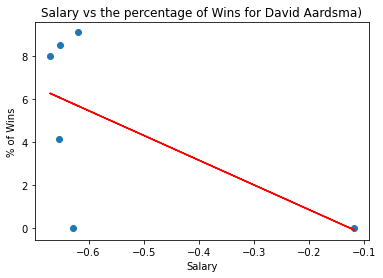

In [17]:
##Pitcher_David_Aardsma: correlation and linear regression
x_val= Pitcher_David_Aardsma['Salary_Std']
y_val = Pitcher_David_Aardsma['percentage_of_wins']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
#regression value equation
regress_val = x_val* slope + intercept
#line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#we create a scatterplot
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
#labels
plt.title('Salary vs the percentage of Wins for David Aardsma)')
plt.xlabel('Salary')
plt.ylabel('% of Wins')
#show results
plt.show()

In [18]:
#pitcher Barry Zito's stats
pitcher_barry_zito = pitching_and_salaries[(pitching_and_salaries['playerID']== 'zitoba01')]
pitcher_barry_zito

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,percentage_of_wins,percentage_of_loss
6199,zitoba01,2001,OAK,240000,-0.701528,35,17,8,48.571429,22.857143
6200,zitoba01,2002,OAK,295000,-0.683147,35,23,5,65.714286,14.285714
6201,zitoba01,2003,OAK,1000000,-0.451895,35,14,12,40.000000,34.285714
6202,zitoba01,2004,OAK,3000000,0.143357,34,11,11,32.352941,32.352941
6203,zitoba01,2005,OAK,5600000,0.816759,35,14,13,40.000000,37.142857
6204,zitoba01,2006,OAK,7900000,1.340647,34,16,10,47.058824,29.411765
6205,zitoba01,2007,SFN,10000000,1.852363,34,11,13,32.352941,38.235294
6206,zitoba01,2008,SFN,14500000,2.709934,32,10,17,31.250000,53.125000
6207,zitoba01,2009,SFN,18500000,3.482031,33,10,13,30.303030,39.393939
6208,zitoba01,2010,SFN,18500000,3.411927,34,9,14,26.470588,41.176471


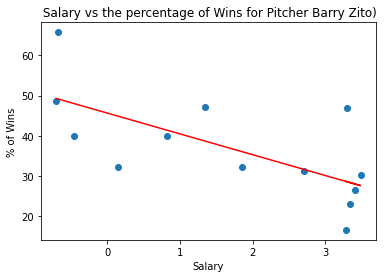

In [19]:
##Pitcher_David_Aardsma: analysing correlation and linear regression
x_val= pitcher_barry_zito['Salary_Std']
y_val = pitcher_barry_zito['percentage_of_wins']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
#regression value equation
regress_val = x_val* slope + intercept
#line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#we create a scatterplot
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
#labels
plt.title(' Salary vs the percentage of Wins for Pitcher Barry Zito)')
plt.xlabel('Salary')
plt.ylabel('% of Wins')
#show results
plt.show()

In [20]:
#nyyankees team info
nyy_team = pitching_and_salaries[(pitching_and_salaries['teamID']== 'NYY')]
nyy_team.head(5)

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,percentage_of_wins,percentage_of_loss


In [21]:
#chicago cubs team info
cubs_team = pitching_and_salaries[(pitching_and_salaries['teamID']== 'CHC')]
cubs_team.head(5)

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,percentage_of_wins,percentage_of_loss


In [22]:
#phillies team info
phillies_team = pitching_and_salaries[(pitching_and_salaries['teamID']== 'PHI')]
phillies_team

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,percentage_of_wins,percentage_of_loss
35,adamsmi03,2013,PHI,5000000,0.257195,28,1,4,3.571429,14.285714
36,adamsmi03,2014,PHI,7000000,0.585714,22,2,1,9.090909,4.545455
39,adamste01,2002,PHI,2700000,0.100142,46,7,9,15.217391,19.565217
40,adamste01,2003,PHI,2900000,0.093777,66,1,4,1.515152,6.060606
42,adamste01,2005,PHI,500000,-0.587568,16,0,2,0.000000,12.500000
...,...,...,...,...,...,...,...,...,...,...
6047,wolfra02,2005,PHI,6625000,1.099002,13,6,4,46.153846,30.769231
6048,wolfra02,2006,PHI,9125000,1.664859,12,4,0,33.333333,0.000000
6087,worleva01,2012,PHI,495000,-0.629135,23,6,9,26.086957,39.130435
6094,worreti01,2004,PHI,2750000,0.072838,77,5,6,6.493506,7.792208


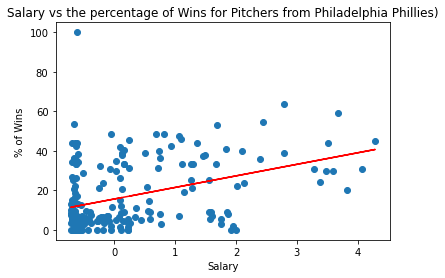

In [23]:
#phillies team : correlation and linear regression
x_val= phillies_team['Salary_Std']
y_val = phillies_team['percentage_of_wins']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
#this regression value equation
regress_val = x_val* slope + intercept
#this line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#we create a scatterplot
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
#these are the labels
plt.title('Salary vs the percentage of Wins for Pitchers from Philadelphia Phillies)')
plt.xlabel('Salary')
plt.ylabel('% of Wins')
#now we show the results
plt.show()

In [24]:
#arizona_diamond_backs team info
arizona_diamond_backs = pitching_and_salaries[(pitching_and_salaries['teamID']== 'ARI')]
arizona_diamond_backs

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,percentage_of_wins,percentage_of_loss
110,anderbr02,2000,ARI,2250000,0.102100,33,11,7,33.333333,21.212121
111,anderbr02,2001,ARI,4125000,0.634575,29,4,9,13.793103,31.034483
112,anderbr02,2002,ARI,5375000,0.971367,35,6,11,17.142857,31.428571
123,anderch01,2015,ARI,512500,-0.688095,27,6,6,22.222222,22.222222
142,aquingr01,2005,ARI,325000,-0.635756,35,0,1,0.000000,2.857143
...,...,...,...,...,...,...,...,...,...,...
6038,wittbo01,2001,ARI,500000,-0.612111,14,4,1,28.571429,7.142857
6188,zieglbr01,2012,ARI,1795000,-0.353145,77,6,1,7.792208,1.298701
6189,zieglbr01,2013,ARI,3150000,-0.115506,78,8,1,10.256410,1.282051
6190,zieglbr01,2014,ARI,4500000,0.100780,68,5,3,7.352941,4.411765


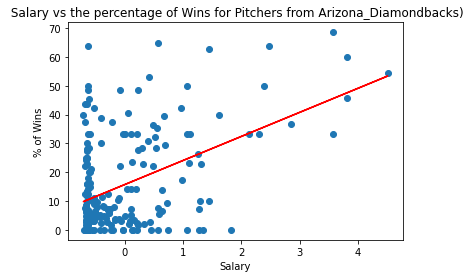

In [25]:
#arizona_diamond_backs team : correlation and linear regression

x_val= arizona_diamond_backs['Salary_Std']
y_val = arizona_diamond_backs['percentage_of_wins']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
#regression value equation
regress_val = x_val* slope + intercept
#this is line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#create scatterplot
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
#labels
plt.title(' Salary vs the percentage of Wins for Pitchers from Arizona_Diamondbacks)')
plt.xlabel('Salary')
plt.ylabel('% of Wins')
#show the results
plt.show()

In [26]:
#pitsburg pirates team info
pitsburg_pirates = pitching_and_salaries[(pitching_and_salaries['teamID']== 'PIT')]
pitsburg_pirates

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,percentage_of_wins,percentage_of_loss
125,anderji02,2000,PIT,215000,-0.706308,27,5,11,18.518519,40.740741
126,anderji02,2001,PIT,285000,-0.686052,34,9,17,26.470588,50.000000
127,anderji02,2002,PIT,305000,-0.679890,28,8,13,28.571429,46.428571
156,armasto02,2007,PIT,3000000,0.015369,31,4,5,12.903226,16.129032
168,arroybr01,2001,PIT,225000,-0.706687,24,5,7,20.833333,29.166667
...,...,...,...,...,...,...,...,...,...,...
6012,wilsoju10,2013,PIT,493500,-0.650683,58,6,1,10.344828,1.724138
6013,wilsoju10,2014,PIT,515000,-0.672205,70,3,4,4.285714,5.714286
6089,worleva01,2015,PIT,2450000,-0.336218,23,4,6,17.391304,26.086957
6152,yatesty01,2008,PIT,800000,-0.557207,72,6,3,8.333333,4.166667


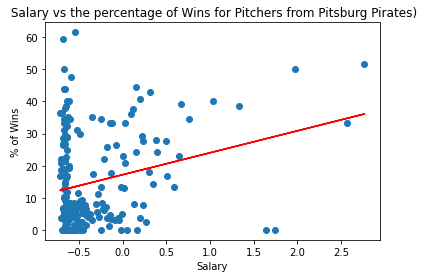

In [27]:
#pitsburg pirates team : correlation and linear regression
x_val= pitsburg_pirates['Salary_Std']
y_val = pitsburg_pirates['percentage_of_wins']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
#this is the regression value equation
regress_val = x_val* slope + intercept
#line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#we create a scatterplot
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
#labels
plt.title(' Salary vs the percentage of Wins for Pitchers from Pitsburg Pirates)')
plt.xlabel('Salary')
plt.ylabel('% of Wins')
#show results
plt.show()

In [28]:
#nya team info
nya_team = pitching_and_salaries[(pitching_and_salaries['teamID']== 'NYA')]
nya_team

,playerID,yearID,teamID,salary,Salary_Std,G,W,L,percentage_of_wins,percentage_of_loss
5,aardsda01,2012,NYA,500000,-0.628073,1,0,0,0.000000,0.000000
19,aceveal01,2010,NYA,435650,-0.637296,10,3,0,30.000000,0.000000
26,aceveju01,2003,NYA,900000,-0.480615,25,0,3,0.000000,12.000000
64,albaljo01,2008,NYA,393225,-0.654213,7,0,1,0.000000,14.285714
65,albaljo01,2009,NYA,403075,-0.657543,32,5,1,15.625000,3.125000
...,...,...,...,...,...,...,...,...,...,...
5926,whitega01,2004,NYA,1925000,-0.159873,24,0,1,0.000000,4.166667
5985,willito02,2001,NYA,320000,-0.674015,15,1,0,6.666667,0.000000
6014,wilsoju10,2015,NYA,556000,-0.680195,74,5,0,6.756757,0.000000
6115,wrighja02,2005,NYA,5666667,0.835117,13,5,5,38.461538,38.461538


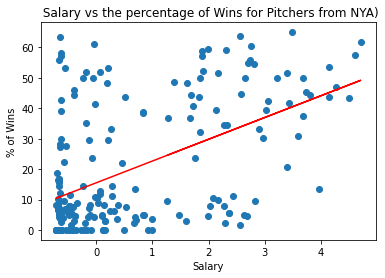

In [29]:
#nya team : correlation and linear regression
x_val= nya_team['Salary_Std']
y_val = nya_team['percentage_of_wins']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
#regression value equation
regress_val = x_val* slope + intercept
#line equation:
line_equation = "y = " + str(slope) + "x + " + str(intercept)
#we create a scatterplot
plt.scatter(x_val,y_val)
plt.plot(x_val,regress_val,"r-")
#labels
plt.title(' Salary vs the percentage of Wins for Pitchers from NYA)')
plt.xlabel('Salary')
plt.ylabel('% of Wins')
#show results
plt.show()